In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [123]:
df=pd.read_csv("electronics_packaging_data.csv")

In [124]:

df.shape
df.columns.tolist()
df.dtypes
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductID               4000 non-null   object 
 1   ProductName             4000 non-null   object 
 2   ProductCategory         4000 non-null   object 
 3   Weight_g                4000 non-null   float64
 4   FragilityLevel          4000 non-null   int64  
 5   Dimensions_cm           4000 non-null   object 
 6   MaterialType            4000 non-null   object 
 7   SustainabilityScore     4000 non-null   float64
 8   Material_Type_ID        4000 non-null   int64  
 9   Strength_mpa            4000 non-null   float64
 10  Weight_Capacity_kg      4000 non-null   float64
 11  Biodegradability_Score  4000 non-null   float64
 12  CO2_Emission_Score      4000 non-null   float64
 13  Recyclability_Percent   4000 non-null   float64
 14  SuggestedEcoMaterial    4000 non-null   

In [129]:
df.isnull().sum()


ProductID                 0
ProductName               0
ProductCategory           0
Weight_g                  0
FragilityLevel            0
Dimensions_cm             0
MaterialType              0
SustainabilityScore       0
Material_Type_ID          0
Strength_mpa              0
Weight_Capacity_kg        0
Biodegradability_Score    0
CO2_Emission_Score        0
Recyclability_Percent     0
SuggestedEcoMaterial      0
CostPerPackage            0
dtype: int64

In [133]:
print("Before:", df.shape)
df = df.drop_duplicates()
print("After:", df.shape)


Before: (4000, 16)
After: (4000, 16)


In [136]:
def remove_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    cleaned_data = data[(data[column] >= lower) & (data[column] <= upper)]
    return cleaned_data




In [139]:


# select numeric columns
num_cols = [
    'Weight_g', 'Strength_mpa', 'Weight_Capacity_kg',
    'Biodegradability_Score', 'CO2_Emission_Score',
    'Recyclability_Percent', 'CostPerPackage', 'SustainabilityScore'
]

outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
    outliers[col] = outlier_rows

    print(f"\n🔍 Outliers in {col}:")
    if outlier_rows.empty:
        print("No outliers found.")
    else:
        print(outlier_rows[[col]])



🔍 Outliers in Weight_g:
No outliers found.

🔍 Outliers in Strength_mpa:
No outliers found.

🔍 Outliers in Weight_Capacity_kg:
No outliers found.

🔍 Outliers in Biodegradability_Score:
No outliers found.

🔍 Outliers in CO2_Emission_Score:
No outliers found.

🔍 Outliers in Recyclability_Percent:
No outliers found.

🔍 Outliers in CostPerPackage:
No outliers found.

🔍 Outliers in SustainabilityScore:
No outliers found.


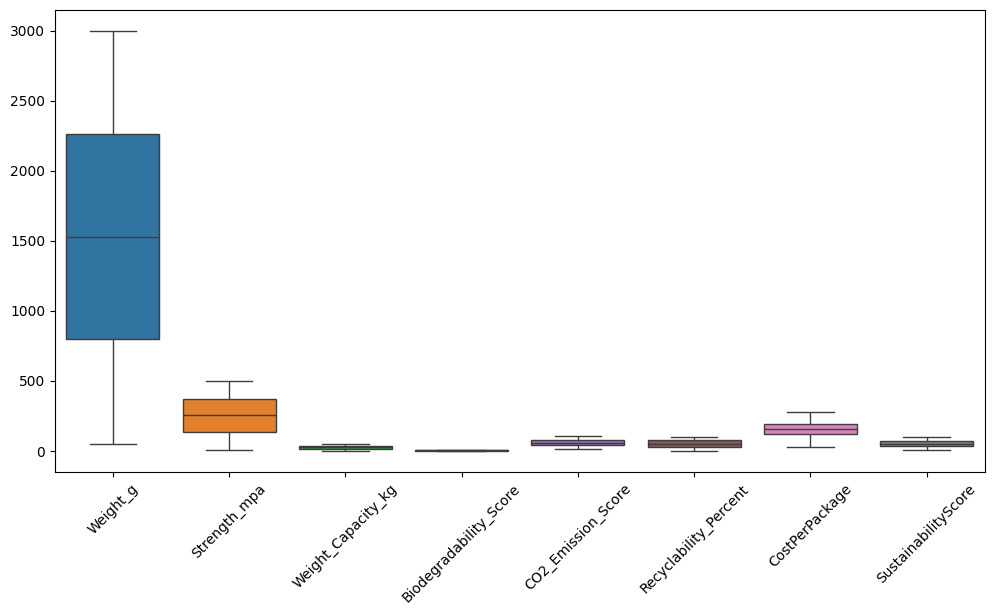

In [144]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()


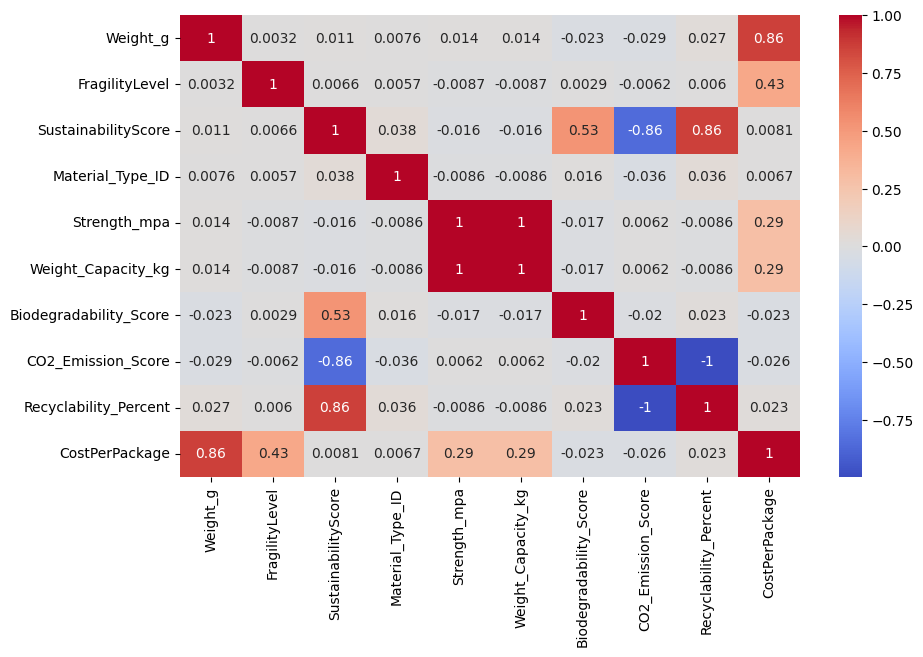

In [148]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()



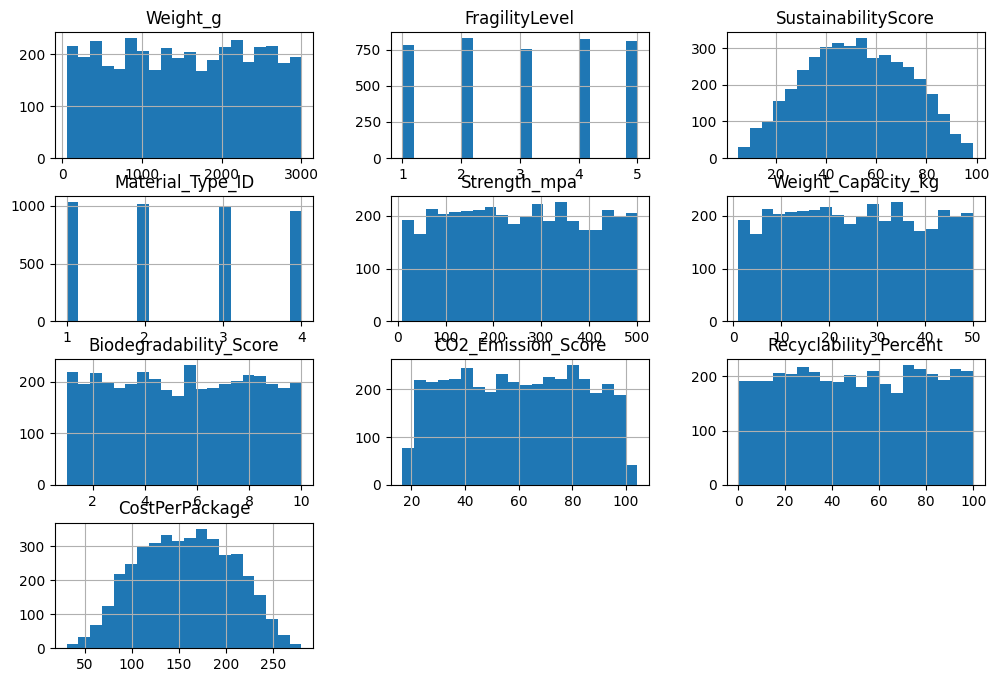

In [151]:
df.hist(figsize=(12,8), bins=20)
plt.show()


In [153]:
df.info()
df.describe()
df.to_csv("Ecopack_cleaned.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductID               4000 non-null   object 
 1   ProductName             4000 non-null   object 
 2   ProductCategory         4000 non-null   object 
 3   Weight_g                4000 non-null   float64
 4   FragilityLevel          4000 non-null   int64  
 5   Dimensions_cm           4000 non-null   object 
 6   MaterialType            4000 non-null   object 
 7   SustainabilityScore     4000 non-null   float64
 8   Material_Type_ID        4000 non-null   int64  
 9   Strength_mpa            4000 non-null   float64
 10  Weight_Capacity_kg      4000 non-null   float64
 11  Biodegradability_Score  4000 non-null   float64
 12  CO2_Emission_Score      4000 non-null   float64
 13  Recyclability_Percent   4000 non-null   float64
 14  SuggestedEcoMaterial    4000 non-null   